In [22]:
import scipy as sp
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spla
import scipy.linalg as sla
import scipy.linalg as spalg
import matplotlib.pyplot as plt
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Лабораторная работа 2. SVD

## 1. Волшебные невязки (2 балла)

Сгенерируйте командой `scipy.linalg.hilbert` матрицу Гильберта размера $500\times500$. Назовём эту матрицу $A$. 

Возьмите вектор $z = (0,0,\ldots,0,1)\in\mathbb{R}^{500}$. Вычислите $b = Az$ и решите систему уравнений $Ax = b$ вашим любимым способом.

Теперь исказите вектор $b$ небольшой (по модулю не большей $0.0001$ по каждой координате) случайной ошибкой и для полученного вектора $b'$ решите систему $Ax = b'$ тем же самым способом.

Сравните невязки $||A\hat{x} - b||_2$ и $||A\hat{x}' - b'||_2$, где $\hat{x}$ и $\hat{x}'$ - полученные вами решения. Попробуйте объяснить эффект.

**Важно!** Баллы будут ставиться не за реализацию, а за объяснения!

In [46]:
size = 500
A = sp.linalg.hilbert(size)
z = np.zeros(size)
z[-1] = 1
b = A.dot(z)
changed_b = b + np.random.rand(size) / 10000

x = spla.spsolve(A, b)
changed_x = sla.solve(A, changed_b)
print(sla.norm(A.dot(x) - b))
print(sla.norm(A.dot(changed_x) - changed_b))

4.251892590377822e-16
0.014044864068378387


In [49]:
print(sla.norm(A))
print(sla.norm(np.linalg.inv(A)))

2.66433428197
2.29985199202e+19


Мы знаем, что относительная погрешность возрастает не более, чем в $||A|| \cdot ||A^{-1}||$ раз. Норма обратной матрицы очень велика, а машинная точность ограничена, из-за чего можно следующие неприятные эффекты на ошибку.

## 2. Неожиданно теоретическая задача (2 балла)

Для двух заданных матриц $A$ и $B$ одного размера найдите ортогональную матрицу $Q$, для которой норма Фробениуса разности $||QA - B||_F$ минимальна.

---
*Ваше решение*

## 3. Сжатие информации с помощью SVD (3 балла)

Загрузите выложенную на странице курса фотографию вашего любимого куратора Сони.

Поскольку фотография чёрно-белая, её можно проинтерпетировать как матрицу, элементы которой - это насыщенность серого цвета каждого из пикселей. Постройте сингулярное разложение этой матрицы (не нужно центрировать данные!). 

Визуализуйте первую главную компоненту. Ожидали ли вы увидеть именно это? Почему?

Визуализуйте компонеты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Во сколько раз меньше памяти потребуется для их хранения? Как изменится результат, если сначала вы центрируете данные?

**Важное замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.

### Решение

Загрузим изображение

In [2]:
from PIL import Image
from scipy import misc


img = misc.imread('./Sonya_small.jpg', mode='L') # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Посмотрим на Соню!

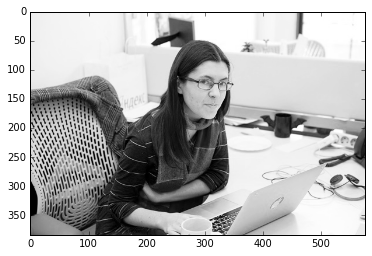

In [3]:
imgplot = plt.imshow(img, cmap='Greys_r')

In [4]:
def get_svd_approximation(matrix, principal_begin, principal_end):
    u, sigma, v = sla.svd(matrix)
    shape = u.shape[0], v.shape[0]
    new_sigma = np.zeros(shape)
    for i in range(principal_begin, principal_end + 1):
        new_sigma[i][i] = sigma[i]
    return (u.dot(new_sigma)).dot(v)

Посмотрим отдельно на первую компоненту.

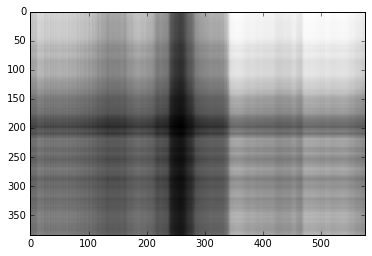

In [90]:
plt.imshow(get_svd_approximation(img, 0, 0), cmap='Greys_r')

Видим, что первая компонента ловит только главные различия в интенисвности цвета из-за того, что приближение всего лишь одноранговое.

Визуализируем сумму главных компонент с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. 

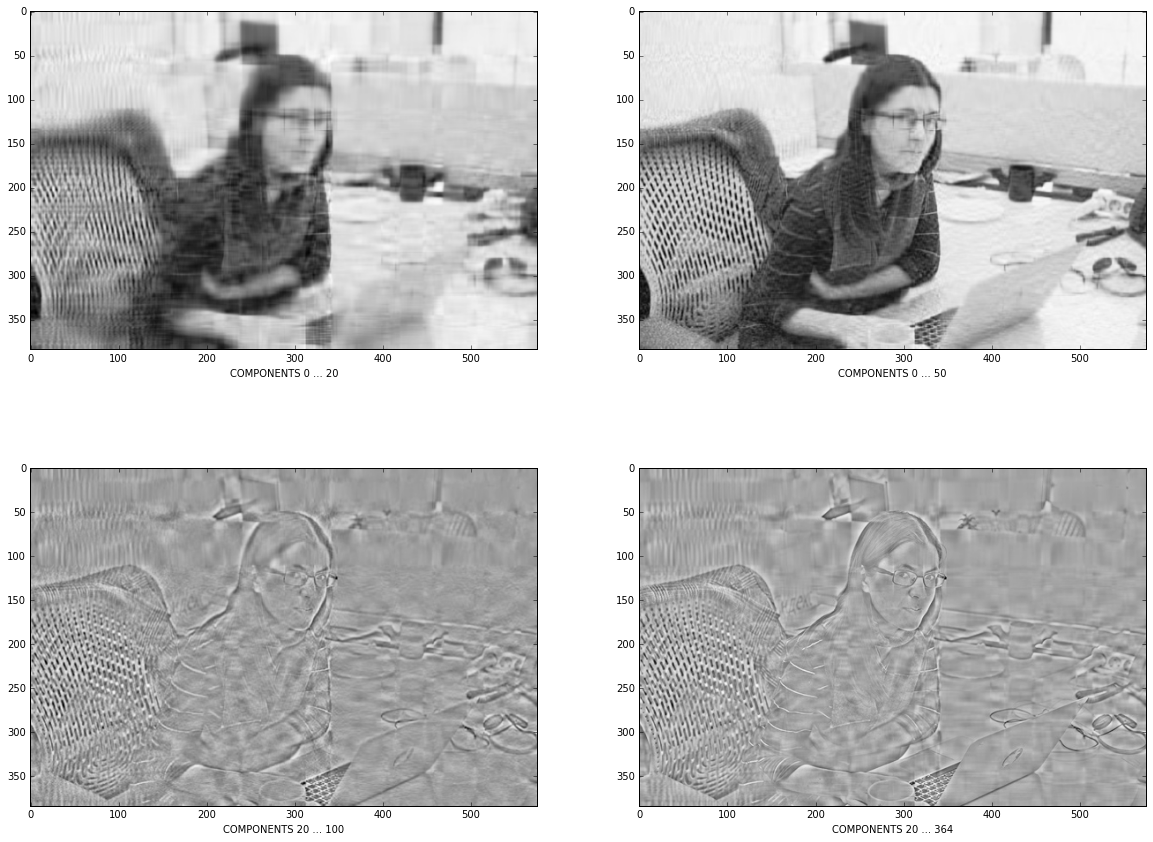

In [96]:
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.xlabel('COMPONENTS 0 ... 20')
plt.imshow(get_svd_approximation(img, 0, 20), cmap='Greys_r')
plt.subplot(222)
plt.xlabel('COMPONENTS 0 ... 50')
plt.imshow(get_svd_approximation(img, 0, 50), cmap='Greys_r')
plt.subplot(223)
plt.xlabel('COMPONENTS 20 ... 100')
plt.imshow(get_svd_approximation(img, 20, 100), cmap='Greys_r')
plt.subplot(224)
plt.xlabel('COMPONENTS 20 ... 364')
plt.imshow(get_svd_approximation(img, 20, 364), cmap='Greys_r')

Первые двадать и пятьдесят компонент выглядят немного зашумленными.
Взяв только компоненты с маленькими дисперсиями, то есть с 20-ой по 100-ую, мы получили высокую детализацию, но потеряли интенсивность цвета, поскольку большая дисперсия заключена в первых компонентах. Кроме того, последние компоненты с 100-ой практически не приносят никакого вклада.

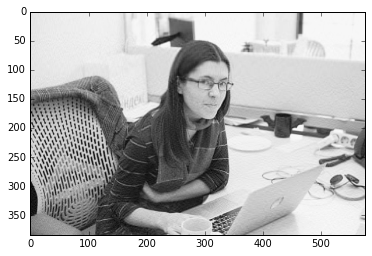

In [98]:
plt.imshow(get_svd_approximation(img, 0, 100), cmap='Greys_r')

In [99]:
print(img.shape)

(384, 576)


Кажется, что первые 100 компонент достаточно неплохо приближают исходную картинку. При этом на хранение первых 100 компонент нам понадобится $100 \cdot (1 + 384 + 576) = 96100$ чисел, то есть мы будем хранить в $(384*576) / 96100 \approx 2.3$ раза меньше памяти.

Теперь посмотрим, как изменится ситуация, если центрировать картинку.

2596.02648838
2615.86506598


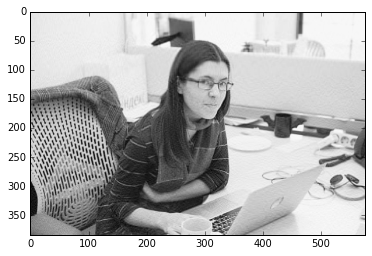

In [15]:
def get_centered_svd_approximation(matrix, principal_begin, principal_end):
    mean = matrix.mean(0)
    centered_matrix = matrix.copy() * 1.0
    for i, j in np.ndindex(img.shape):
        centered_matrix[i, j] -= mean[j]
    
    u, sigma, v = sla.svd(centered_matrix)
    shape = u.shape[0], v.shape[0]
    new_sigma = np.zeros(shape)
    for i in range(principal_begin, principal_end + 1):
        new_sigma[i][i] = sigma[i]
    temp = (u.dot(new_sigma)).dot(v)
    for i, j in np.ndindex(img.shape):
        temp[i, j] += mean[j]
    return temp

centered_appr = get_centered_svd_approximation(img, 0, 100)
appr = get_svd_approximation(img, 0, 100)
plt.imshow(centered_appr, cmap='Greys_r')
print(sla.norm(img - centered_appr))
print(sla.norm(img - appr))

Видим, что центрирование не дало существенного изменения картинки. По прежнему, если взять первые сто компонент, то получаем примерное такое же качество в смысле нормы Фробениуса.

## 4. Снижение размерности с помощью SVD (4 балла)

Загрузите со страницы курса файлы `messages_texts.txt`, `messages_features.txt` и `messages_vectorized.mtx`.

**Внимание!** Не пытайтесь открыть файл `messages_vectorized.txt` в блокноте или, тем более, распечатать его в IPython ноутбуке. Сначала посмотрите на его объём.

* `messages_texts.txt` содержит некоторое количество текстовых сообщений на английском языке. Сообщение номер k начинается с заголовка post_number_k.
* `messages_features.txt` содержит список пар `(слово, номер соответствующего признака)` для всех слов, которые содержатся в теле сообщений, кроме самых употребительных из списка `stopwords.words("english")`
* `messages_vectorized.mtx` содержит разреженную матрицу, содержащая индексы [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) всех слов из messages_features в каждом сообщении.

*Замечание* Не обязательно парсить файл `messages_texts.txt`; чтобы найти сообщение с нужным номером, вы можете просто воспользоваться поиском по файлу!

В этом задании вы попробуете представить сообщения векторами небольшой размерности. Идея вот в чём. Изначально каждое сообщение у нас представлена огромным количеством признаков: tf-idf индексами всех слов. SVD позволяет значительную часть информации собрать в нескольких новых признаках; тем самым, сообщения будут представлены достаточно короткими векторами.

Загрузите матрицу `messages_vectorized.mtx`. Поскольку она очень большая, не пытайтесь вычислять полное SVD; вместо этого воспользуйтесь функцией [scipy.linalg.svds](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.svds.html#scipy.sparse.linalg.svds), которая вычисляет $k$ старших сингулярных значений и векторов. Возьмите $k = 6$ и визуализуйте сообщения в пространстве первых трёх новых признаков. Какие геометричские особенности датасета становятся видны? Стоят ли за этим какие-то содержательные закономерности? Возможно, придётся запустить несколько раз, чтобы получилась хорошая картинка (а она действительно хорошая!).

Какой методологический недочёт был допущен при создании матрицы `messages_vectorized.mat`? Как он повлиял на поведение SVD?

Попытайтесь выяснить, какие из исходных признаков (то есть какие слова) вносят наибольший вклад в три новых признака.

In [62]:
import scipy.io as sio
from sklearn.preprocessing import scale

X = sio.mmread('./messages_vectorized.mtx')

In [63]:
X.shape

(2696, 39036)

In [28]:
u, sigma, v = spla.svds(X)

Посчитаем новые признаки.

In [31]:
new_features = u.dot(np.diag(sigma))

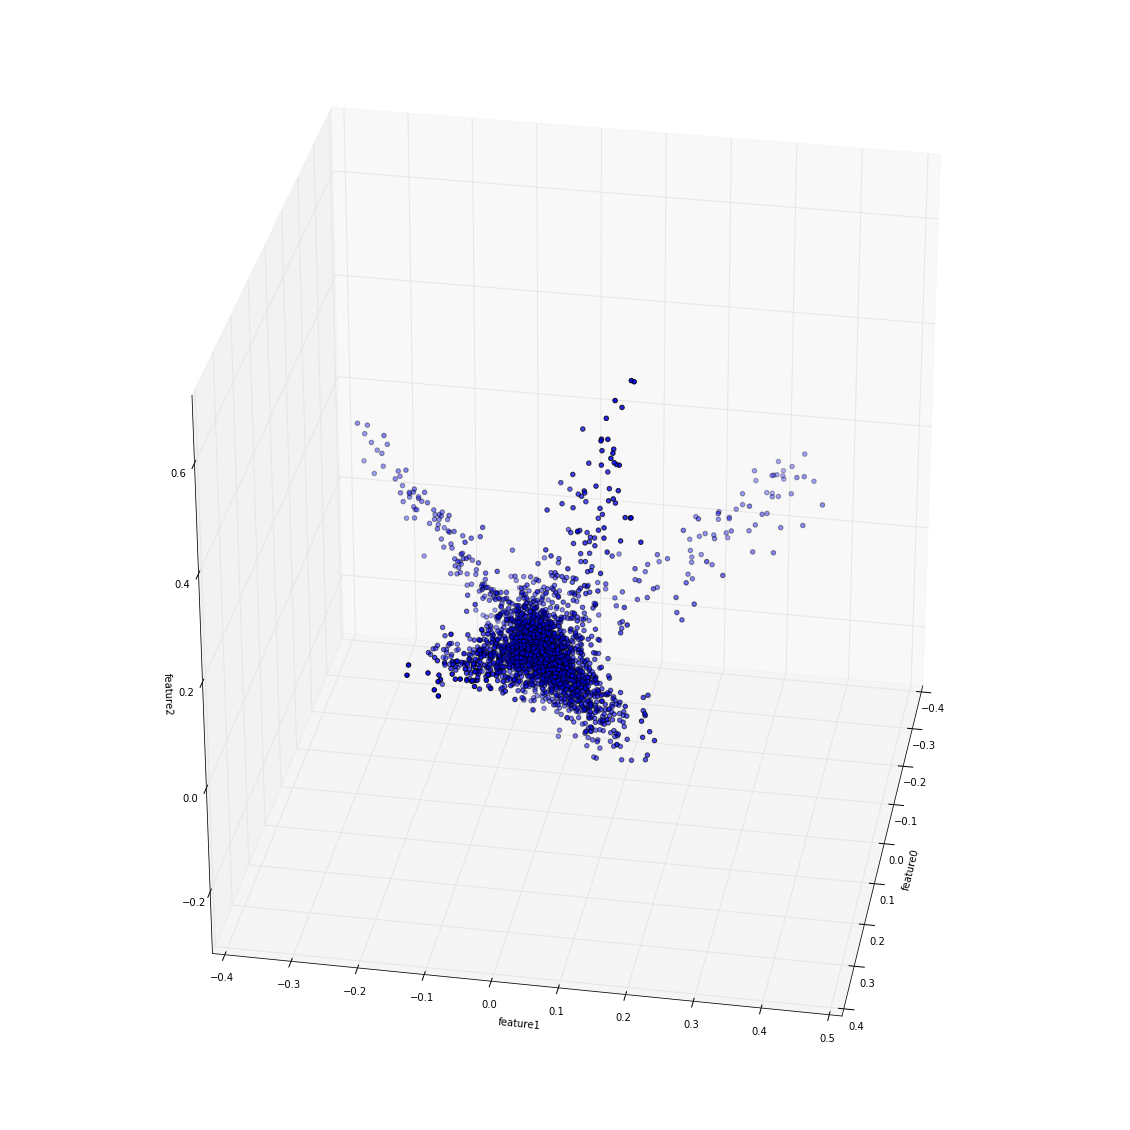

In [55]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_features[:, 0], new_features[:, 1], new_features[:, 2])

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature2')
ax.view_init(azim=10)

plt.show()

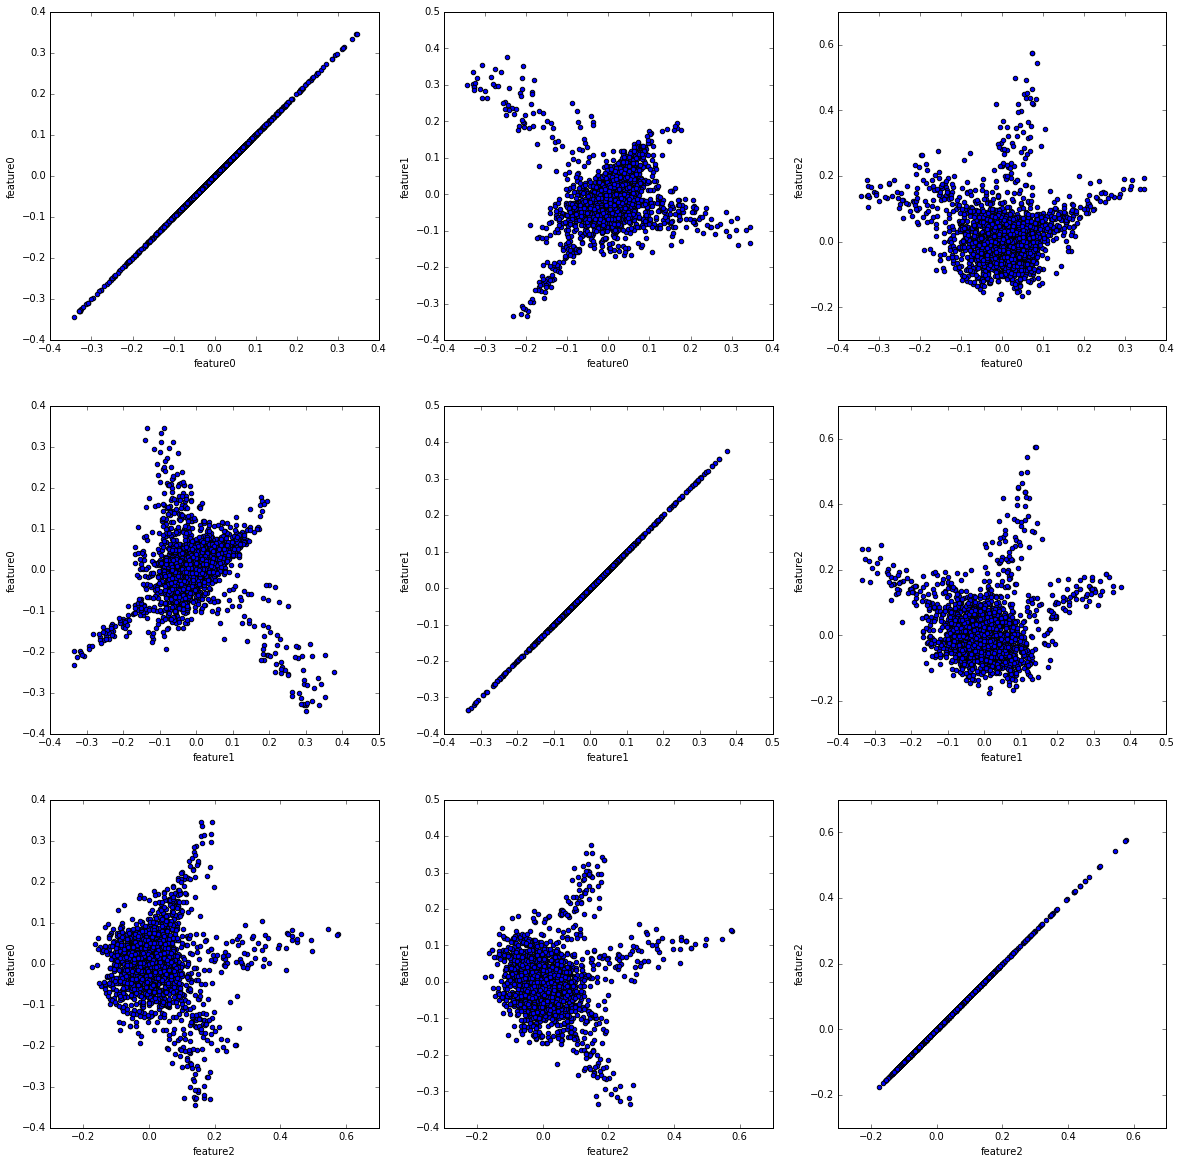

In [38]:
plt.figure(figsize=(20,20))

counter = 0
for i in range(3):
    for j in range(3):
        plt.subplot(331 + counter)
        plt.scatter(new_features[:, i], new_features[:, j], label='123')
        plt.xlabel('feature' + str(i))
        plt.ylabel('feature' + str(j))
        counter += 1
plt.show()

Я попробовал визулизировать все три признака в 3d и пары признаков на плоскости. Какой-то красивой геометрии я не смог пронаблюдать. Можно только заметить, что первый и второй признаки относительно третьего очень похожи друг на друга, хотя они и не скореллированы. Хотя можно заметить, что все данные сконцентрированы около некоторого плотного пятна.

Сравните результаты с тем, что получилось бы, если воспользоваться [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/random_projection.html). Они вызываются следующими заклинаниями:

In [64]:
from sklearn import random_projection

print(X.shape)
transformer = random_projection.GaussianRandomProjection(n_components=6)
X_new = transformer.fit_transform(X)

(2696, 39036)


In [65]:
X_new.shape

(2696, 6)

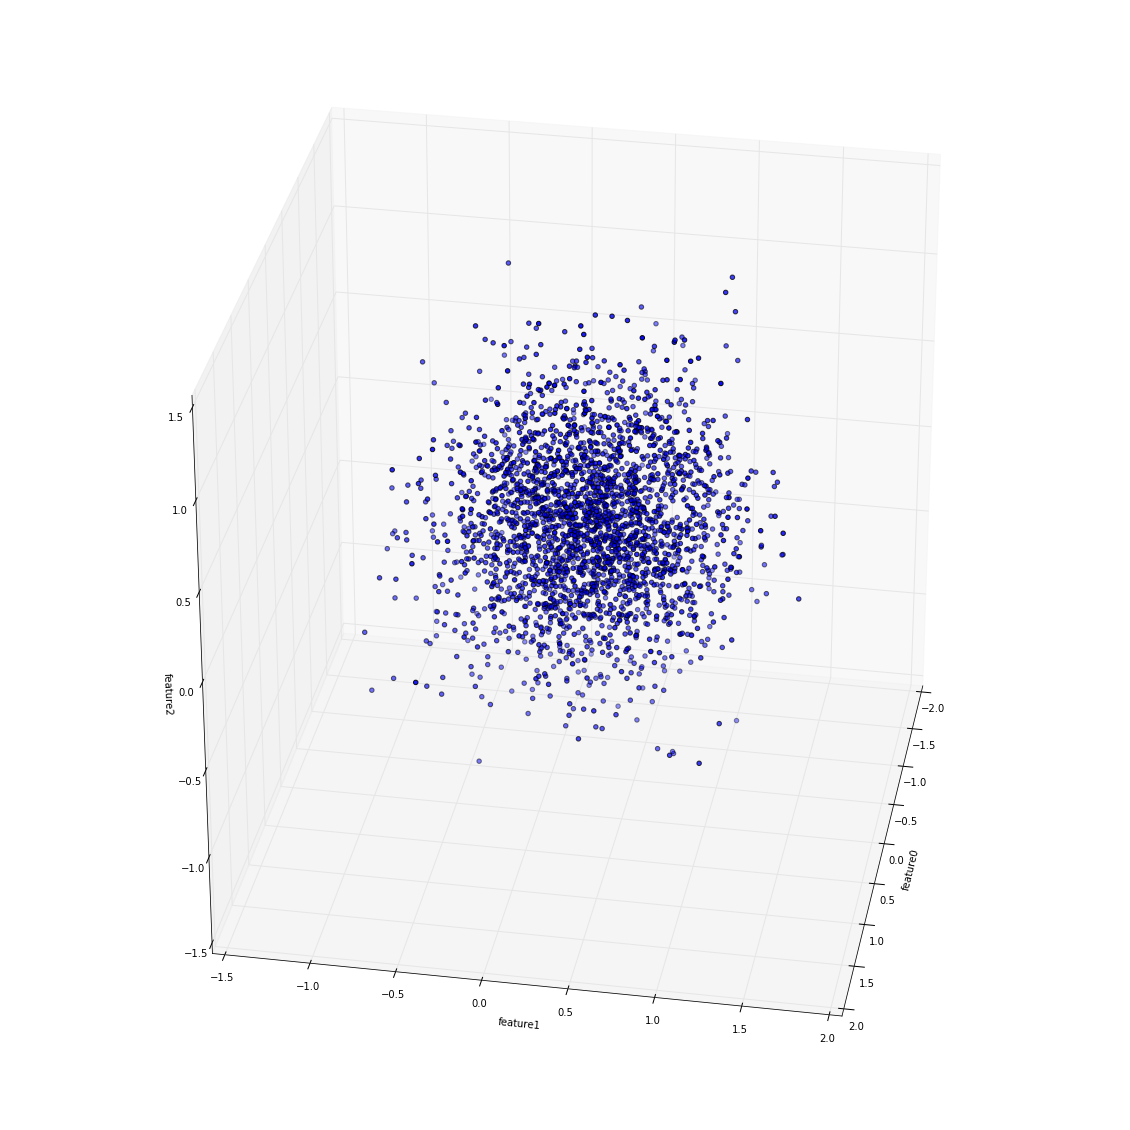

In [66]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2])

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature2')
ax.view_init(azim=10)

plt.show()

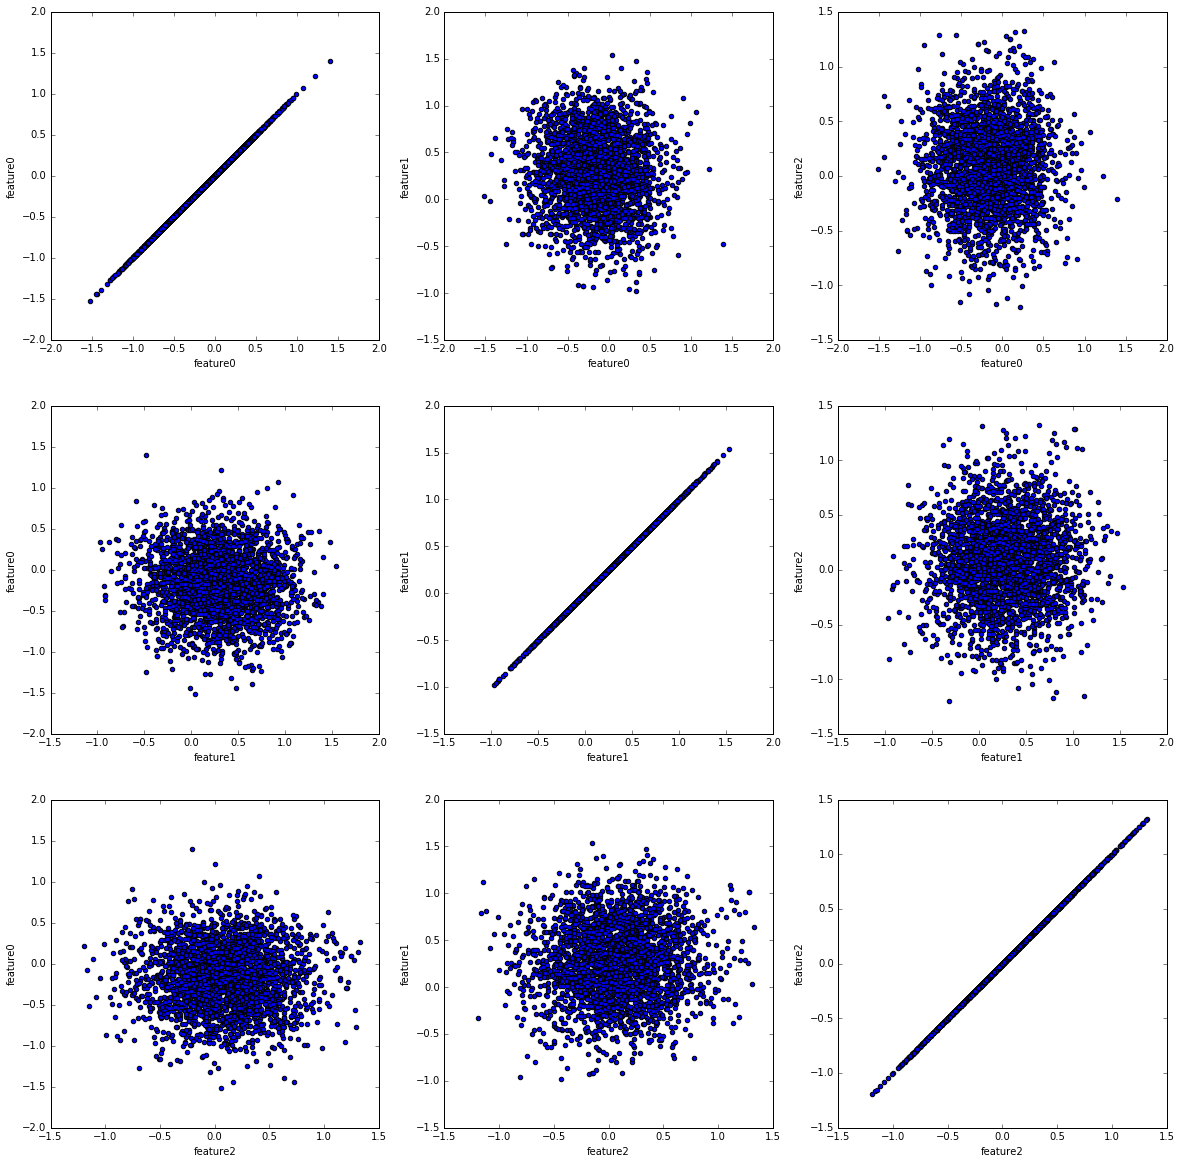

In [67]:
plt.figure(figsize=(20,20))

counter = 0
for i in range(3):
    for j in range(3):
        plt.subplot(331 + counter)
        plt.scatter(X_new[:, i], X_new[:, j], label='123')
        plt.xlabel('feature' + str(i))
        plt.ylabel('feature' + str(j))
        counter += 1
plt.show()

Видим, что гауссовская проекция дает представление данных в виде пятен или эллипсоидов, из которых вообще нельзя ничего сказать.

**Центрировать данные** можно с помощью функции `sklearn.preprocessing.scale`:

*P.S.* Если оперативная память вам позволит (кажется, 2Гб должно хватить), можете всё-таки попробовать сделать полное SVD и сравнить полученную картинку с той, что выдаёт `svds`.

## 5. Низкоранговые приближения своими руками (до 6 баллов)

В этой задаче вам предстоит поразмышлять о низкоранговых приближениях и об их месте в мироздании.

Везде ниже $||\cdot||_2$ --- это операторная $l_2$-норма.

Зафиксируем некоторое $\varepsilon > 0$. Найти низкоранговое приближение матрицы $A$ с точностью $\varepsilon$ --- значит найти такую матрицу $Q$ с $k = k(\varepsilon)$ ортонормированными столбцами, для которой
$$
\begin{matrix}
\phantom{AAAAAAAAAAAAAAAAA} &
||A - QQ^TA||_2 < \varepsilon & \phantom{AAAAAAAAAAAAaa}(1)\end{matrix}$$
В этом случае линейная оболочка столбцов матрицы $Q$ является в каком-то смысле приближённым образом $A$.

Если ранг $k$ нам из каких-то соображений известен, то можно воспользоваться, например, сингулярным разложением. А если нет? Есть несколько способов этот ранг найти; мы предлагаем вам поэкспериментировать с одним из них.

Идея проста: если мы возьмём образы достаточно большого количества случайных векторов (обычно их берут из стандартного нормального распределения), с хорошей вероятностью их линейная оболочка будет приближать образ с нужной нам точностью. Главный вопрос в том, когда имеет смысл остановиться. И здесь помогает следующая

**Теорема.** Пусть $B\in\mathrm{Mat}_{m\times n}$ --- некоторая матрица, $\omega_1,\ldots,\omega_r$ --- случайные векторы, независимо выбранные из стандартного нормального распределения. Тогда
$$P\left\{||B||\leqslant 10\sqrt{\frac{2}{\pi}}\max_i{||B\omega_i||}\right\} \geqslant 1 - \min(m,n)\cdot10^{-r}$$


Следующий алгоритм позволяет для матрицы $A$ размера $m\times n$ найти ортогональную матрицу $Q$, такую что

$$P\left\{||(E - QQ^T)A||_2\leqslant\varepsilon\right\} \geqslant 1 - \min\{m,n\}\cdot10^{-r}$$

---

\begin{align*}
&\textbf{Алгоритм}\\
&\mbox{Draw }\omega^{(1)},\ldots,\omega^{(r)}\sim\mathcal{N}(0, E)\\
&\mbox{Compute }y^{(i)} = A\omega^{(i)}\\
&Q^{(0)} = []\mbox{ (an empty matrix $m\times 0$)}\\
&j = 0\\
&\mbox{while }\max\left\{|y^{(j+1)}|,\ldots, |y^{(j+r)}|\right\} > \frac{\varepsilon}{10\sqrt{2/\pi}}:\\
&\qquad j = j + 1\\
&\qquad y^{(j)} = \left(E - Q^{(j-1)}(Q^{(j-1)})^T\right)y^{(j)}\\
&\qquad q^{(j)} = \frac{y^{(j)}}{|y^{(j)}|}\\
&\qquad Q^{(j)} = \left[Q^{(j-1)}\, q^{(j)}\right]\mbox{ (add new column)}\\
&\qquad \mbox{Draw }\omega^{(j + r)}\sim\mathcal{N}(0, E)\\
&\qquad y^{(j + r)} = \left(E - Q^{(j)}(Q^{(j)})^T\right)A\omega^{(j + r)}\\
&\qquad \mbox{for }i = (j + 1), (j + 2), . . . , (j + r − 1):\\
&\qquad\qquad y^{(i)} = y^{(i)} - (q^{(j)}, y^{(i)})q^{(j)}\\
&\mbox{return } Q^{(j)} 
\end{align*}

---

**Основное задание.** Напишите функцию `find_approximate(A, eps)` (у неё могут быть и другие аргументы, если вам это кажется необходимым), находящую для данной матрицы $A$ и уровня точности $\varepsilon$ матрицу $Q$, удовлетворяющую условию (1). Поэкспериментируйте с матрицами разного размера. Получается ли ошибка $||A - QQ^TA||_2$ достаточно малой?

**Дополнительные вопросы:**

1. Каков вообще (геометрический? линейно алгебраический?) смысл неравенства $||A - QQ^TA||_2 < \varepsilon$? Что мы имеем в виду говоря, что линейная оболочка столбцов матрицы $Q$ является приближённым образом $A$? Кратко (но убедительно:)) объясните, почему предложенный алгоритм действительно делает свою работу.

2. Как построить приближённый SVD, если у нас уже имеется матрица $Q$, удовлетворяющая условию (1)? Найдите этим способом сингулярное разложение матрицы Гильберта и сравните его с вычисленным с помощью библиотечной функции `scipy.linalg.svd`. Удаётся ли вашей функции обогнать по времени библиотечную?

3. Зачастую при поиске низкорангового приближения фиксированного ранга $k$ для матрицы $A$ работают даже не с ней. а с матрицей $(AA^T)^qA$, где $q$ --- небольшое натуральное число (скажем, $2$ или $3$). Зачем это нужно? В каких случаях это оправдано?

4. У функции `make_regression` (см. ниже) есть любопытный параметр `effective_rank` (эффективный ранг). Попробуйте разобраться, что это такое. Можете попробовать дать его определение.

За основное задание можно получить не более 3 баллов; остальные 3 вы сможете набрать, ответив на дополнительные вопросы.

**В помощь хозяйке:**

Сгенерировать матрицу $X$ размера $m\times n$ с эффективным рангом $k$ можно с помощью команды

`X, y = make_regression(n_samples=m, n_features=n, n_informative=n, n_targets=1, bias=0.0, \
                       effective_rank=k, tail_strength=..., noise=0.0, shuffle=True, coef=False, random_state=None)`

Чтобы она подключилась, введите `from sklearn.datasets import make_regression`

Можете поэкспериментировать со значением `tail_strength`.

In [42]:
import sys

def dynamic_print(string):
    sys.stdout.write('\r{}'.format(string))

def max_vector(Y, lower, upper):
    max_norm = -1.0
    for index in range(lower, upper):
        maximal_norm = max(spalg.norm(Y[index]), max_norm)
    return maximal_norm
    
def find_approximate(A, eps):
    m = A.shape[0]
    n = A.shape[1]
    r = 0
    while (min(m, n) * 10**(-r) > 0.1):
        r += 1
    mean = np.zeros(n)
    cov = np.identity(n)
    W = []
    for i in range(r + 1):
        W.append(np.squeeze(np.asarray(np.random.multivariate_normal(mean, cov))))
    Y = []
    for i in range(r + 1):
        Y.append(np.squeeze(np.asarray(A.dot(W[i]))))
    Q = []
    magic_const = eps / (10 * sqrt(2 / np.pi))
    j = 0
    while (max_vector(Y, j + 1, j + r + 1) > magic_const):
        #print(max_vector(Y, j + 1, j + r + 1))
        j = j + 1
        Q_j_1 = np.matrix(Q)
        if j > 1:
            Y[j] = np.squeeze(np.asarray((np.identity(m).astype(np.float32) - Q_j_1.T.dot(Q_j_1)).dot(Y[j])))
        q_j = Y[j].copy() / spalg.norm(Y[j])
        Q.append(q_j.copy())
        Q_j = np.matrix(Q)
        w_j_r = np.squeeze(np.asarray(np.random.multivariate_normal(mean, cov)))
        y_j_r = np.identity(m, dtype=np.float32) - Q_j.T.dot(Q_j)
        y_j_r = y_j_r.dot(A.dot(w_j_r).T)
        y_j_r = np.squeeze(np.asarray(y_j_r))
        W.append(w_j_r)
        Y.append(y_j_r)
        for i in range(j + 1, j + r):
            Y[i] = Y[i] - np.dot(q_j, Y[i])*q_j
    #dynamic_print(max_vector(Y, j + 1, j + r + 1))
    return np.matrix(Q)

In [45]:
from sklearn.datasets import make_regression

for shape in [(10, 5), (5, 2), (10, 20), (40, 30), (30, 50), (50, 100)]:
    m = shape[0]
    n = shape[1]
    A, y = make_regression(n_samples=m, n_features=n, n_informative=n, n_targets=1, bias=0.0, \
                       effective_rank=n / 2, noise=0.0, shuffle=True, coef=False, random_state=None)

    Q = find_approximate(A, 0.01)
    print (spalg.norm((np.identity(A.shape[0]) - Q.T.dot(Q)).dot(A)))

3.45667699598e-16
1.40942946377e-16
5.7474512394e-16
6.19673931704e-15
8.95981505432e-16
1.54776915849e-15


Ошибка получается даже гораздо более меньшей, чем тот порог точности, который задается в алгоритме.

1. Смысл неравенства состоит в том, что мы приближаем матрицу $A$ матрицей $QQ^{T}A$ по операторной норме, то есть любой вектор растягивается по длине в не более, чем $\varepsilon$ раз оператором разности $A$ и $QQ^{T}A$.  Это в том числе означает, что длины проекций векторо из линейной облочкой столбцов матрицы $Q$ на линейное пространство, натянутое на столбцы матрицы $A$, достаточно небольшие.   

4. Этот параметр означает необходимое количество сингулярных векторов, чтобы задать эту матрицу с хорошей точностью, проще говоря, сколько главных компонент нужно оставить, не особо потеряв в качестве.

## 6. Blessing of dimensionality (3 балла)

Это в каком-то смысле продолжение задания 3; вы попробуете сжать временной ряд с помощью тензорных разложений (то есть сделать такие же картинки, как вам показывали на семинаре).

Загрузите временной ряд (если интересно, он взят [отсюда](https://www.quandl.com/data/BOE/XUDLNKG-Effective-Exchange-Rate-Index-Norwegian-Krone-1990-Average-100)) из файла `BOE-XUDLNKG.csv`

In [ ]:
import pandas as pd

x = pd.read_csv(r'...\BOE-XUDLNKG.csv')['Value'].as_matrix()
x = x[:10332]


Сожмите его несколькими способами:
- с помощью SVD (трансформировав в матрицу, близкую к квадратной), 
- с помощью HOSVD (трансформировав в тензор валентности 3, по возможности близкий к кубическому) 
- с помощью тензорного поезда.

Постарайтесь не только минимизировать ранги, но и добиться, чтобы относительная ошибка --- то есть $\frac{||x - x'||}{||x||}$ --- в каждом случае была не больше 0,05.

Нарисуйте восстановленные из сжатых тензоров ряды. Во сколько раз в каждом из способов удаётся уменьшить объём хранимых данных?

*Замечание* В этом задании не надо пользоваться никакими специальными библиотеками, только стандартными функциями (например, `np.tensordot`, `np.transpose`, `reshape`, `sla.svd`).